# **Modelagem Matemática e Computacional - Aula prática 14**
### Nome: Riquelme Freitas Gomes
### Data: 22/11/2023
<br>

# **Objetivo:**
> ### Estudar e pôr em prática a modelagem matemática e a análise de dados utilizando o deeptime e os métodos TICA e VAMP.

# **Deeptime**

> #### Deeptime é uma biblioteca Python para análise de dados de séries temporais. Em particular, são implementados métodos para redução de dimensão, agrupamento e estimativa de modelo de Markov.

## **Redução de dimensão**

#### Aqui apresentamos algumas técnicas de redução/decomposição de dimensão implementadas no pacote.

### **Métodos do operador Koopman**

#### Todos os métodos contidos neste subpacote estão relacionados ao operador Koopman $𝞙_τ$ definido como $$[K_τg](x) =E[g(x_{t+τ})∣ x_t​ =x]$$ para um processo $\{x_t\}_{t≥0}$ com densidade de transição $p_τ(x,y).$ Ao projetar $𝞙_τ$ em uma base finita, procura-se $$E[g(x_{t+τ})]= K^τE[f(x_t)],$$ onde $K∈R^{n×m}$ é uma matriz Koopman de dimensão finita que propaga o observável $f$ do estado do sistema $x_t$ para o observável $g$ no estado $x_{t+τ}$.

### **TICA**

> #### TICA é a abreviatura de Time-lagged Independent Component Analysis (às vezes também ICA baseada em estrutura de tempo) e é um método de transformação linear que pode ser usado para redução de dimensionalidade. Foi introduzido para dinâmica molecular e, posteriormente, como um método no pipeline de construção do modelo de Markov.

<br>

#### TICA com dados caracterizados é algoritmicamente idêntico à decomposição em modo dinâmico estendido (EDMD) (caso contrário, decomposição em modo dinâmico (DMD)), que na prática também é usado para analisar séries temporais que não estão em equilíbrio detalhado, produzindo complexos autofunções com valor.

<br>

#### A entrada para o algoritmo TICA é um conjunto de dados de série temporal. Devido à natureza linear do método, pode ser útil primeiro caracterizar os dados de entrada, passando-os por funções não lineares. Isto poderia ser, por exemplo, distâncias entre pares, caso a entrada seja baseada em dados de dinâmica molecular.

<br>

#### Quando os dados de entrada são o resultado de um processo de Markov, o TICA encontra de fato uma aproximação para as funções e valores próprios do operador de Markov subjacente.

<br>

#### Para tanto, mapeia os dados para os processos “lentos”, ou seja, encontra as coordenadas de autocorrelação máxima em um determinado tempo de defasagem $τ$. Dada uma sequência de dados multivariados $X_t$, ele calcula a covariância sem média e a matriz de covariância defasada no tempo $$C_0=(X_t-μ)^Tdiag(w)(X_t-μ)$$ $$C_τ=(X_t-μ)^Tdiag(w)(X_{t+τ}-μ),$$

#### onde $w$ é um vetor de pesos para cada intervalo de tempo. Opcionalmente, pode-se usar a estimativa reversível usando matrizes de correlação simetrizadas $$∑_t X_t+X_{t+τ}$$ e matrizes de segundo momento definidas por
#### $$X_t^⊤X_t + X_{t+τ}^⊤X_{t+τ}$$ e $$X_{t+τ}^⊤X_t + X_{t}^⊤X_{t+τ}$$

#### Por padrão, os pesos $w$ são todos iguais a um, mas pesos diferentes são possíveis, como a reponderação ao equilíbrio. Posteriormente, o problema do autovalor $$C_τr_i=C_0λ_ir_i$$ está resolvido, onde r_i são os componentes independentes e λ_i são suas respectivas autocorrelações de tempo normalizadas. Os autovalores estão relacionados à escala de tempo de relaxamento por $$t_i=-\frac{τ}{ln|λ_i|}$$ Quando usado como método de redução de dimensão, os dados de entrada são projetados nos componentes independentes dominantes. Como os autovalores $λ_i$ são indicadores da lentidão dos seus respectivos processos, esses componentes dominantes pertencem aos processos mais lentos nos dados.

#### **Observações**

* #### Baseado no princípio variacional.

* #### O TICA utiliza as suposições como priori e, portanto, pode fornecer resultados mais interpretáveis do que sua generalização, o VAMP.

* #### Pode fornecer resultados enviesados se o processo observado contiver eventos raros que não são suficientemente refletidos na série temporal.

* #### Dual ao DMD: A matriz estimada é a transposta da estimada pelo DMD; o TICA estima autovalores e o DMD estima 'modos', os coeficientes que levam ao operador de Koopman aproximado usando os autovalores.

* #### Os autovalores da decomposição estão relacionados aos tempos de relaxamento.

* #### Pode identificar conjuntos metastáveis.

* #### É VAMP se o sistema for reversível e a biblioteca de ansatz contiver apenas a observável do estado completo $Ψ(x)=x$.

* #### Pode lidar com um grande número de quadros devido à estimação online de covariâncias.

### **VAMP**

> #### VAMP é a abreviação de [V]ariational [A]pproach for [M]arkov [P]rocesses. Ele pode ser usado como ferramenta de redução de dimensionalidade linear e estende o TICA no sentido de que dá origem a uma forma sistemática de selecionar recursos de entrada, bem como lida com dados fora do equilíbrio de forma consistente. O método é uma forma de análise de correlação canônica (originalmente apresentada em 1935) no tempo, também chamada de análise de correlação canônica defasada no tempo (TCCA).

<br>

#### Embora o modelo VAMP possua métodos para projetar dados em dimensões inferiores, ele também é equipado com funções de pontuação (as chamadas pontuações VAMP), que permitem a classificação de características.

<br>

#### Para estimar um modelo VAMP, um operador Koopman $𝞙_τ$ é estimado, o que descreve valores de expectativa futura condicional para um intervalo de tempo fixo $τ$. Sua ação em uma função $g$ pode ser escrito como $$𝞙_τg(x)= \int p(y | x)g(y)dy=E[g(x_{t+τ}|x_t=x)],$$ onde p(y | x) é a densidade de probabilidade condicional de que um ponto $y$ no tempo $t+τ$ visitado dado que o ponto $x$ foi visitado no tempo $t$. Fazendo a suposição de que $g$ é uma combinação linear $g=∑_i w_iχ_i$ para algumas funções de base $χ_i$, o operador linear $𝞙_τ$ pode ser expresso como uma matriz $K$. Pode ser demonstrado que as principais eigenfunções de uma SVD (Decomposição em Valores Singulares) do operador Koopman em uma base ajustada proporcionam o melhor modelo dinâmico para uma série temporal dada, o que também é calculado e projetado nos estimadores e modelos, respectivamente.

<br>

#### O método VAMP lida de forma consistente com casos fora do equilíbrio, os quais podem ser divididos em três subcategorias:
1. #### **Dinâmicas não-homogêneas no tempo:** Por exemplo, o sistema observado é impulsionado por uma força externa dependente do tempo.
2. #### **Dinâmicas não-reversíveis homogêneas no tempo:** Ou seja, o equilíbrio detalhado não é obedecido, e as observações podem ser de um regime não estacionário.
3. #### **Dinâmicas reversíveis, mas dados não estacionários:** Isto é, o sistema possui uma distribuição estacionária com relação à qual ele obedece ao equilíbrio detalhado, mas os dados disponíveis empiricamente não convergiram para essa distribuição estacionária.

O terceiro caso descrito pode ser recuperado com TICA quando um procedimento especial de reponderação (reponderação de Koopman) é utilizado.

#### **Observações**

* #### Baseado no princípio variacional.

* #### É uma análise de correlação canônica (CCA) no tempo, ou seja, CCA com defasagem temporal (TCCA).

* #### É VAC em dinâmicas reversíveis e pontuação VAMP-1.

* #### Utiliza uma decomposição de valor singular das covariâncias em vez de uma decomposição de autovalor.

* #### Lida consistentemente com dados fora do equilíbrio.

* #### As funções singulares podem ser agrupadas para encontrar conjuntos metastáveis e coerentes.

* #### Equivalente ao EDMD no caso da pontuação VAMP-1.

* #### Utiliza uma biblioteca de ansatz Ψ de funções como base.

* #### Pode lidar com uma grande quantidade de quadros devido à estimação online de covariâncias.

# **Experimentos com os códigos disponibilizados**

In [2]:
pip install deeptime

O código a seguir realiza as seguintes operações:
* Gera uma função de seno em um intervalo de 0 a 2π e adiciona ruído gaussiano a ela.
* Calcula a derivada verdadeira da função seno
* Calcula a derivada usando diferenças finitas
* Calcula a derivada total-variação regularizada da função com o ruído adicionado usando o método tv_derivative do módulo deeptime.util.diff
* Plota as funções originais, a função com ruído, a derivada verdadeira, a derivada por diferenças finitas e a derivada total-variação regularizada.

<br>

A derivada total-variação regularizada é calculada como uma abordagem para suavizar a derivada de uma função, preservando ao mesmo tempo as descontinuidades significativas (mudanças bruscas) na função original. O parâmetro \alpha controla a quantidade de regularização aplicada. O resultado é então plotado para visualização e comparação com as outras funções.

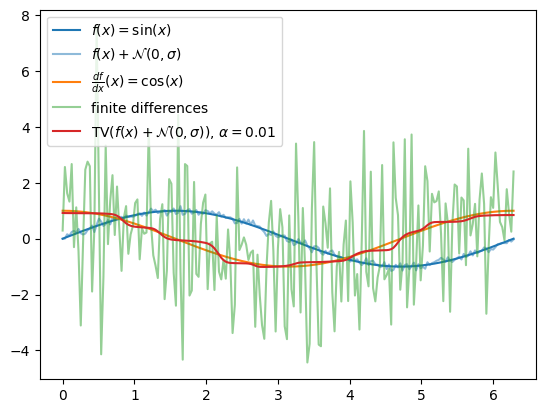

In [4]:
r"""
TV Derivative
=============

Total-variation regularized derivative on a noisy function.
"""

import numpy as np
import deeptime.util.diff as diff
import matplotlib.pyplot as plt

noise_variance = .08 * .08
x0 = np.linspace(0, 2.0 * np.pi, 200)
testf = np.sin(x0) + np.random.normal(0.0, np.sqrt(noise_variance), x0.shape)
true_deriv = np.cos(x0)
df_tv = diff.tv_derivative(x0, testf, alpha=0.001, tol=1e-5, fd_window_radius=5, sparse=False)

plt.figure()
plt.plot(x0, np.sin(x0), label=r'$f(x) = \sin(x)$')
plt.plot(x0, testf, label=r'$f(x) + \mathcal{N}(0, \sigma)$', color='C0', alpha=.5)
plt.plot(x0, true_deriv, label=r'$\frac{df}{dx}(x) = \cos(x)$')
plt.plot(x0, np.gradient(testf, x0), label='finite differences', alpha=.5)
plt.plot(x0, df_tv, label=r'$\mathrm{TV}(f(x) + \mathcal{N}(0, \sigma))$, $\alpha = 0.01$')
plt.legend()

O gráfico gerado pelo código exibe várias curvas para visualizar diferentes aspectos do processo. Aqui estão algumas observações sobre cada componente do gráfico:

* **Função Original:** A curva azul representa a função seno original.

* **Função com Ruído:** A curva cinza representa a função seno com a adição de ruído gaussiano. A sombra dessa curva reflete a variabilidade introduzida pelo ruído.

* **Derivada Verdadeira:** A curva laranja representa a derivada verdadeira da função seno.

* **Diferenças Finitas:** A curva verde representa a derivada calculada usando diferenças finitas. Esta é uma abordagem numérica comum para estimar derivadas.

* **Derivada Total-Variação Regularizada:** A curva vermelha representa a derivada total-variação regularizada da função com ruído. A introdução de uma penalidade de total-variação ajuda a suavizar a derivada, mantendo bordas nítidas.

<br>

O código visa demonstrar como a derivada total-variação regularizada pode ser aplicada a uma função com ruído para estimar uma derivada mais suave que preserva as características importantes da função original. A partir dele, podemos observar que a derivada achada com deeptime (curva vermelha) se assemelha muito a derivada real (curva laranja).

Vamos refazer o código usando uma função diferente. Neste caso, usaremos a função $f(x)=x^2$ como exemplo. Aqui está o código modificado:

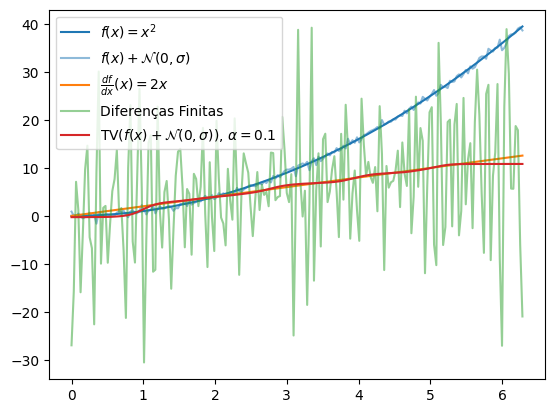

In [10]:
import numpy as np
import deeptime.util.diff as diff
import matplotlib.pyplot as plt

# Geração de dados com menos ruído
x0 = np.linspace(0, 2.0 * np.pi, 200)
testf = x0**2 + np.random.normal(0.0, 0.5, x0.shape)  # Reduzindo a quantidade de ruído

# Cálculo da derivada verdadeira
true_deriv = 2 * x0

# Cálculo da derivada usando diferenças finitas
finite_diff = np.gradient(testf, x0)

# Cálculo da derivada total-variação regularizada com ajustes nos parâmetros
df_tv = diff.tv_derivative(x0, testf, alpha=0.1, tol=1e-5, fd_window_radius=5, sparse=False)  # Reduzindo o valor de alpha

# Plotagem
plt.figure()
plt.plot(x0, x0**2, label=r'$f(x) = x^2$')
plt.plot(x0, testf, label=r'$f(x) + \mathcal{N}(0, \sigma)$', color='C0', alpha=.5)
plt.plot(x0, true_deriv, label=r'$\frac{df}{dx}(x) = 2x$')
plt.plot(x0, finite_diff, label='Diferenças Finitas', alpha=.5)
plt.plot(x0, df_tv, label=r'$\mathrm{TV}(f(x) + \mathcal{N}(0, \sigma))$, $\alpha = 0.1$')  # Reduzindo o valor de alpha
plt.legend()
plt.show()

A função $f(x)=x^2$ é uma função quadrática, e sua derivada exata é
$2x$. Vamos analisar alguns fatores que podem influenciar a diferença entre a derivada total-variação regularizada e a derivada original:

1. **Quantidade de Ruído:** Se a quantidade de ruído adicionado for significativa, pode ser mais desafiador para o método de regularização preservar a verdadeira derivada da função original.

2. **Parâmetros de Regularização $(α)$:** O parâmetro $α$ controla a força da penalidade de total-variação. Se escolhido de forma inadequada, pode resultar em uma regularização excessiva ou insuficiente. Experimentar diferentes valores de $α$ pode influenciar a qualidade da regularização.

3. **Sensibilidade à Função Original:** A capacidade da regularização de preservar características da função original pode depender da natureza da própria função. Funções com variações rápidas ou descontinuidades podem ser mais desafiadoras de regularizar.

<br>

Nesse caso, reduzi a quantidade de ruído e diminuí o valor de $α$. Esses ajustes resultaram em uma derivada total-variação regularizada que se assemelha mais à derivada verdadeira da função original.

O código abaixo gera e visualiza uma trajetória oculta e sua transformação por uma raiz quadrada. A deeptime.data gera uma trajetória discreta dtraj e uma trajetória contínua traj. A trajetória contínua é uma transformação de raiz quadrada da trajetória discreta.

Text(0.5, 1.0, 'Heatmap of observations')

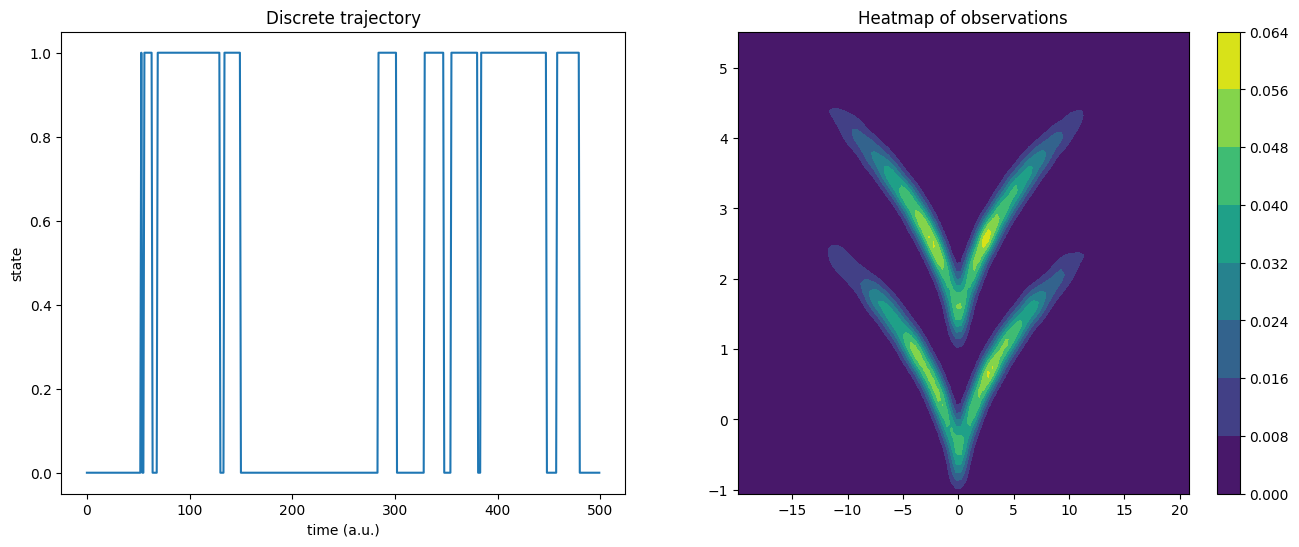

In [13]:
r"""
Sqrt model
==========

Sample a hidden state and an sqrt-transformed emission trajectory. Demonstrates :meth:`deeptime.data.sqrt_model`.
"""

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

from deeptime.data import sqrt_model

n_samples = 10000
dtraj, traj = sqrt_model(n_samples)

X, Y = np.meshgrid(
    np.linspace(np.min(traj[:, 0]), np.max(traj[:, 0]), 100),
    np.linspace(np.min(traj[:, 1]), np.max(traj[:, 1]), 100),
)
kde_input = np.dstack((X, Y)).reshape(-1, 2)

kernel = stats.gaussian_kde(traj.T, bw_method=.1)
Z = kernel(kde_input.T).reshape(X.shape)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.plot(dtraj[:500])
ax1.set_title('Discrete trajectory')
ax1.set_xlabel('time (a.u.)')
ax1.set_ylabel('state')

cm = ax2.contourf(X, Y, Z)
plt.colorbar(cm, ax=ax2)
ax2.set_title('Heatmap of observations')

Os gráficos de saída fornecem uma visualização da trajetória discreta ao longo do tempo (primeiro subplot) e um mapa de calor representando a densidade da trajetória contínua (segundo subplot). Vamos analisar cada gráfico:

<br>

**Gráfico da Trajetória Discreta:**
* No primeiro subplot, a linha mostra a evolução da trajetória discreta ao longo do tempo (nos primeiros 500 passos de tempo).
* O eixo horizontal representa o tempo (unidades arbitrárias) e o eixo vertical representa o estado.
* A trajetória discreta apresenta uma sequência de estados discretos, com mudanças bruscas entre eles.

<br>

**Mapa de Calor das Observações (Trajetória Contínua):**

* O segundo subplot é um mapa de calor que representa a densidade das observações da trajetória contínua.
* Os eixos X e Y representam os valores da trajetória contínua.
* A intensidade das cores indica a densidade, com áreas mais intensas representando regiões onde as observações são mais densas.
* Este mapa de calor mostra como a distribuição das observações é ao longo da trajetória contínua.

<br>

Geralmente, este tipo de visualização é útil para entender a relação entre uma trajetória discreta e sua transformação contínua, que, neste caso, é feita pela raiz quadrada. O mapa de calor ajuda a identificar onde as observações são mais concentradas na trajetória contínua. A escolha da raiz quadrada como transformação pode estar relacionada a algum processo específico ou modelo subjacente, e a análise visual desses gráficos pode fornecer insights sobre essa relação.

Vamos observar um exemplo diferente usando uma função seno transformada. Aqui está o código modificado:

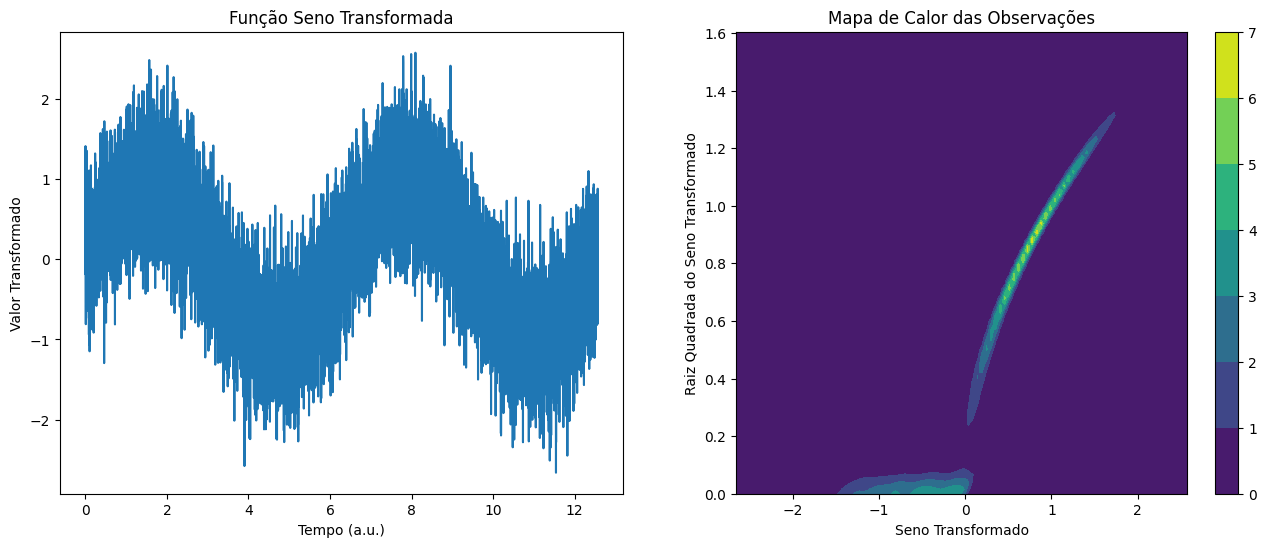

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Geração de dados com uma função seno transformada
n_samples = 10000
time = np.linspace(0, 4 * np.pi, n_samples)
sin_transformed = np.sin(time) + np.random.normal(0.0, 0.5, time.shape)  # Função seno com ruído

# Transformação por raiz quadrada, garantindo que os valores sejam não-negativos
sqrt_transformed = np.sqrt(np.maximum(sin_transformed, 0))

# Criação de uma malha para o KDE
X, Y = np.meshgrid(
    np.linspace(np.min(sin_transformed), np.max(sin_transformed), 100),
    np.linspace(np.min(sqrt_transformed), np.max(sqrt_transformed), 100),
)
kde_input = np.dstack((X, Y)).reshape(-1, 2)

# Estimativa de densidade de kernel (KDE)
kernel = stats.gaussian_kde(np.vstack((sin_transformed, sqrt_transformed)), bw_method=.1)
Z = kernel(kde_input.T).reshape(X.shape)

# Plotagem
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.plot(time, sin_transformed, label=r'$\sin(x) + \mathcal{N}(0, \sigma)$')
ax1.set_title('Função Seno Transformada')
ax1.set_xlabel('Tempo (a.u.)')
ax1.set_ylabel('Valor Transformado')

cm = ax2.contourf(X, Y, Z)
plt.colorbar(cm, ax=ax2)
ax2.set_title('Mapa de Calor das Observações')
ax2.set_xlabel('Seno Transformado')
ax2.set_ylabel('Raiz Quadrada do Seno Transformado')
plt.show()

Neste exemplo, geramos uma função seno com ruído, aplicamos uma transformação por raiz quadrada a essa função e, em seguida, visualizamos a relação entre a função original e sua transformação usando um gráfico de dispersão e um mapa de calor. Isso é feito para ilustrar como a escolha da transformação pode afetar a distribuição das observações.

**VAMP vs. TICA vs. PCA**

Aqui ilustramos o uso das técnicas de redução de dimensionalidade TICA (Time-lagged Independent Component Analysis), VAMP (Variational Approach for Markov Processes), e PCA (Principal Component Analysis) em um conjunto de dados de trajetória bidimensional.

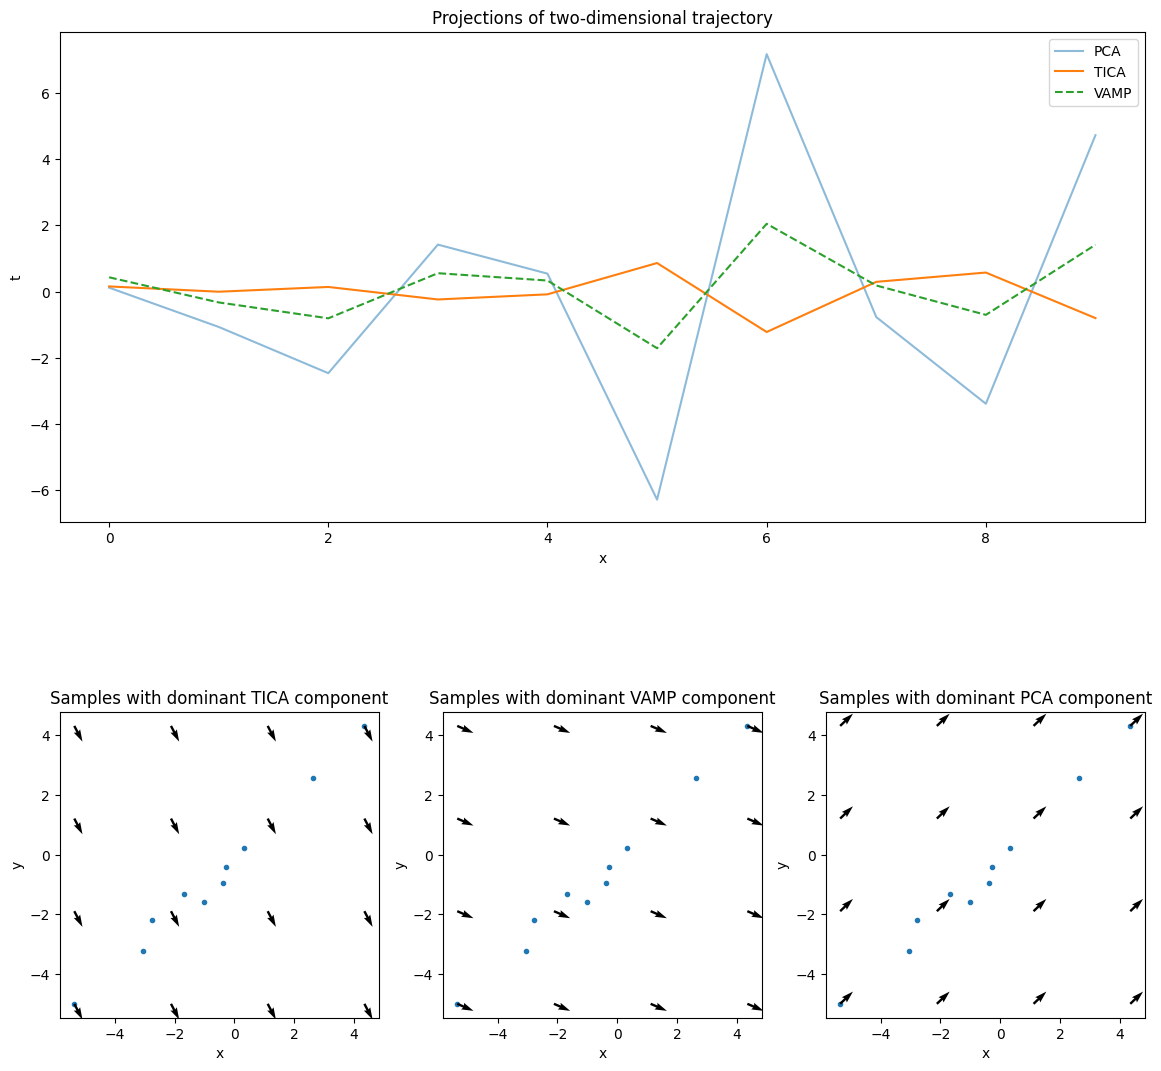

In [12]:
"""
TICA vs. VAMP vs. PCA
=====================

This example directly reflects the example used in the
`TICA documentation <../notebooks/tica.ipynb>`__ plus a VAMP projection.
Since this data stems from an in-equilibrium distribution, TICA and VAMP should not show qualitative differences.
"""

import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

from deeptime.data import ellipsoids
from deeptime.decomposition import VAMP, TICA


def plot_dominant_component(ax, dxy, title):
    x, y = np.meshgrid(
        np.linspace(np.min(feature_trajectory[:, 0]), np.max(feature_trajectory[:, 0]), 4),
        np.linspace(np.min(feature_trajectory[:, 1]), np.max(feature_trajectory[:, 1]), 4)
    )
    ax.scatter(*feature_trajectory.T, marker='.')
    ax.quiver(x, y, dxy[0], dxy[1])
    ax.set_title(title)
    ax.set_aspect('equal')
    ax.set_xlabel('x')
    ax.set_ylabel('y')


data = ellipsoids(seed=17)
discrete_trajectory = data.discrete_trajectory(n_steps=10)

feature_trajectory = data.map_discrete_to_observations(discrete_trajectory)

#print(feature_trajectory)

vamp = VAMP(dim=1, lagtime=1)
vamp = vamp.fit(feature_trajectory).fetch_model()
vamp_projection = vamp.transform(feature_trajectory)
dxy_vamp = vamp.singular_vectors_left[:, 0]  # dominant vamp component

tica = TICA(dim=1, lagtime=1)
tica = tica.fit(feature_trajectory).fetch_model()
tica_projection = tica.transform(feature_trajectory)
dxy_tica = tica.singular_vectors_left[:, 0]  # dominant tica component

pca = PCA(n_components=1)
pca.fit(feature_trajectory)
pca_projection = pca.transform(feature_trajectory)
dxy_pca = pca.components_[0]  # dominant pca component

f = plt.figure(constrained_layout=False, figsize=(14, 14))
gs = f.add_gridspec(nrows=2, ncols=3)
ax_projections = f.add_subplot(gs[0, :])
ax_tica = f.add_subplot(gs[1, 0])
ax_vamp = f.add_subplot(gs[1, 1])
ax_pca = f.add_subplot(gs[1, 2])

ax_projections.set_title("Projections of two-dimensional trajectory")
ax_projections.set_xlabel('x')
ax_projections.set_ylabel('t')

ax_projections.plot(pca_projection, label='PCA', alpha=.5)
ax_projections.plot(tica_projection, label='TICA')
ax_projections.plot(vamp_projection, label='VAMP', linestyle='dashed')
ax_projections.legend()

plot_dominant_component(ax_pca, dxy_pca, 'Samples with dominant PCA component')
plot_dominant_component(ax_tica, dxy_tica, 'Samples with dominant TICA component')
plot_dominant_component(ax_vamp, dxy_vamp, 'Samples with dominant VAMP component')

**Projeções no Espaço 1D:**

* O gráfico superior mostra as projeções no espaço unidimensional (1D) para cada método: PCA (linha sólida), TICA (linha sólida) e VAMP (linha tracejada).
* As diferentes linhas representam as trajetórias projetadas ao longo do tempo em cada método.
* A sobreposição das trajetórias no gráfico superior permite comparar visualmente como as projeções variam ao longo do tempo em cada método.

<br>

**Amostras com Componentes Dominantes:**

* Os gráficos inferiores mostram amostras no espaço bidimensional, com destaque para a direção da componente dominante para cada método.
* As setas indicam a direção da componente dominante em cada ponto do espaço bidimensional.
* A direção da componente dominante destaca a principal variação ou padrão nos dados para cada método, fornecendo uma visão intuitiva de como cada método interpreta a estrutura subjacente dos dados.

<br>

Em resumo, a comparação dos resultados é realizada visualmente nos gráficos gerados pelo código, permitindo uma análise intuitiva e qualitativa do desempenho relativo de TICA, VAMP e PCA na redução de dimensionalidade e interpretação dos dados de trajetória bidimensional.

# **Conclusão**

#### Exploramos as fascinantes ferramentas oferecidas pelo Deeptime, com foco especial nas técnicas de redução de dimensionalidade TICA (Time-lagged Independent Component Analysis) e VAMP (Variational Approach for Markov Processes). Este trabalho buscou compreender como essas abordagens podem proporcionar uma visão aprofundada da dinâmica temporal de sistemas complexos.

#### A utilização do Deeptime permitiu-nos mergulhar nas intrincadas estruturas temporais presentes em conjuntos de dados, proporcionando uma análise mais profunda e significativa. TICA, com sua capacidade de capturar dependências temporais e identificar modos lentos, revelou-se uma ferramenta poderosa para extrair informações cruciais de trajetórias temporais. A aplicação de VAMP complementou essa abordagem ao fornecer uma perspectiva variacional, permitindo a projeção eficiente de trajetórias e a análise de suas características essenciais.

#### Concluímos que a combinação do Deeptime, TICA e VAMP oferece uma abordagem robusta e flexível para a análise de trajetórias temporais. Essas ferramentas, alinhadas ao crescente interesse em entender processos dinâmicos em diversas disciplinas, abrem portas para a descoberta de padrões ocultos e a compreensão mais profunda das complexidades temporais inerentes aos sistemas estudados. O futuro promissor dessas técnicas sugere uma contínua evolução na capacidade de explorar e interpretar a riqueza temporal nos dados científicos e, assim, impulsionar ainda mais as fronteiras do conhecimento.

# **Fontes e referências**

1. Deeptime. https://deeptime-ml.github.io/latest/index.html#
2. TICA. https://deeptime-ml.github.io/latest/notebooks/tica.html
3. VAMP / time-lagged CCA. https://deeptime-ml.github.io/latest/notebooks/vamp.html
4. PyKoopman: A Python Package for Data-Driven Approximation of the Koopman Operator. https://arxiv.org/abs/2306.12962